<a href="https://colab.research.google.com/github/Nao-Ishi/pray_py/blob/master/3pich_man_ani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pillow

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import math

No handles with labels found to put in legend.
No handles with labels found to put in legend.


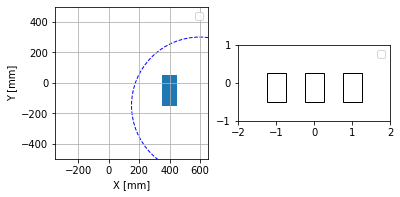

In [2]:
import matplotlib.patches as patches
###############################
#キャンパス設定

fig = plt.figure()
#plt.cla()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=1.0)
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

Mx=650
mx=-350
My=500
my=-500

ax.set_xlim(mx,Mx)
ax.set_ylim(my,My)
ax.set_aspect('equal')

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')

ax.grid(True)

ax.legend()
################################

cir_r = 450
cir_x = 600
cir_y = -150

rect_w = 100
rect_h = 200
rect_x = 400
rect_y = -150

################################
#   _________
#   |       |
#   |       |
#   |       |
#   |   .   |   (x,y)
#   ^^^^^^^^^
################################

c = patches.Circle(xy=(cir_x, cir_y), radius=cir_r, ec='b', ls='--',fill=False)
r = patches.Rectangle(xy=(rect_x-(rect_w/2), rect_y), width=rect_w, height=rect_h)
ax.add_patch(c)
ax.add_patch(r)

Mx=2
mx=-2
My=1
my=-1

ax2.set_xlim(mx,Mx)
ax2.set_ylim(my,My)
ax2.set_aspect('equal')

#ax2.set_xlabel('X [mm]')
#ax2.set_ylabel('Y [mm]')

#ax.grid(True)

ax2.legend()

r = patches.Rectangle(xy=(-1.25,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)
r = patches.Rectangle(xy=(-0.25,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)
r = patches.Rectangle(xy=(0.75,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)


#step_test = ax.plot(0.05,0.9,'',transform=ax.transAxes)
plt.show()

In [0]:
T = np.arange(130.0,195.0)
tag, = ax.plot([0], [0], 'yo')
p1, = ax.plot([0], [0], 'bo')
p2, = ax.plot([0], [0], 'ro')
p3, = ax.plot([0], [0], 'go')
l1, = ax.plot([0, 0], [0, 0], 'g')
l1_, = ax2.plot([0, 0], [0, 0], 'g')
l2, = ax.plot([0, 0], [0, 0], 'b')
l2_, = ax2.plot([0, 0], [0, 0], 'b')
l3, = ax.plot([0, 0], [0, 0], 'r')
l3_, = ax2.plot([0, 0], [0, 0], 'r')
L1 = 150
L2 = 250
PI = np.pi

Sheta = np.array([[0.0]*3 for i in range(len(T))])

def draw_ani(t):
    at = np.radians(T[t])
    xt = np.cos(at) * cir_r + cir_x
    yt = np.sin(at) * cir_r + cir_y
    ##########################
    #https://so-zou.jp/robot/tech/kinematics/inverse-kinematics.htm#
    alpha = np.arccos(
        ((-1)*(xt*xt+yt*yt)+L2*L2+L1*L1)
        /(2*L1*L2)
    )
    
    beta = np.arccos(
        ((-1)*(L2*L2)+(L1*L1)+(xt*xt+yt*yt))
        /(2*L1*np.sqrt(xt*xt+yt*yt))
    )
    sheta1 = np.arctan2(yt,xt)-beta
    sheta2 = (PI - alpha)
    ##########################
    xp1 = np.cos(sheta1)*L1
    yp1 = np.sin(sheta1)*L1
    p1.set_data(xp1,yp1)

    xp2 = np.cos(sheta1+sheta2)*L2
    yp2 = np.sin(sheta1+sheta2)*L2
    p2.set_data(xp1+xp2,yp1+yp2)

    sheta3 = np.arctan2(
        (-yp1-yp2+rect_y+rect_h/2)
        ,(-xp1-xp2+rect_x)
    )
    xp3 = np.cos(sheta3)*100
    yp3 = np.sin(sheta3)*100
    ##########################
    
    tag.set_data(xt, yt)
    l1.set_data([0,xp1],[0,yp1])
    l2.set_data([xp1,xp1+xp2],[yp1,yp1+yp2])
    l3.set_data([xp1+xp2,xp1+xp2+xp3],[yp1+yp2,yp1+yp2+yp3])
    ##########################
    
    xp1 = np.cos(sheta1)*0.5-1
    yp1 = np.sin(sheta1)*0.5
    l1_.set_data([-1,xp1],[0,yp1])

    xp2 = np.cos(sheta2-(PI/4))*0.5
    yp2 = np.sin(sheta2-(PI/4))*0.5
    l2_.set_data([0,xp2],[0,yp2])

    xp3 = np.cos(sheta3+sheta2)*0.5+1
    yp3 = np.sin(sheta3+sheta2)*0.5
    l3_.set_data([1,xp3],[0,yp3])
    ##########################
    Sheta[t][0]=sheta1
    Sheta[t][1]=sheta2-(PI/4)
    Sheta[t][2]=sheta3+sheta2-(PI/4)
    return tag, #p1, p2, p3, l1, l2, l3, l1_,

#アニメーションの描画
ani = animation.FuncAnimation(
      fig,  # Figureオブジェクト
      draw_ani,  # グラフ描画関数
      frames = len(T),  # フレームを設定
      interval = 100,  # 更新間隔(ms)
      repeat = True,  # 描画を繰り返す
      blit = True  # blitting による処理の高速化
      )

ani.save('normaldist_kde_anim.gif', writer='pillow')
plt.show()

In [0]:
Sheta_deg = np.array([[0.0]*3 for i in range(len(T))])
Sheta_deg = Sheta*180/PI
print(Sheta_deg)

[[   1.2529119     3.72179227  -66.24025344]
 [  -2.52011114    9.22777622  -59.09896912]
 [  -6.04290987   14.25183145  -52.41649658]
 [  -9.38759888   18.90621149  -46.0806632 ]
 [ -12.6027918    23.26496942  -40.01757117]
 [ -15.72345783   27.37981741  -34.17574347]
 [ -18.7760545    31.28838832  -28.51786722]
 [ -21.78143696   35.0189201   -23.01611418]
 [ -24.75661501   38.59308713  -17.64931362]
 [ -27.71586628   42.02779866  -12.4011575 ]
 [ -30.67146666   45.33638667   -7.25901552]
 [ -33.63418026   48.52941484   -2.21312815]
 [ -36.61359007   51.61524248    2.7439563 ]
 [ -39.61831734   54.60042424    7.61778148]
 [ -42.65615791   57.48999602   12.41227032]
 [ -45.73415297   60.28767984   17.12993249]
 [ -48.85860345   62.9960292    21.77201373]
 [ -52.03503334   65.61652975   26.33860201]
 [ -55.26810362   68.14966591   30.82870077]
 [ -58.56147693   70.59496098   35.2402772 ]
 [ -61.91763232   72.95099716   39.57029153]
 [ -65.33762994   75.21542071   43.81471271]
 [ -68.820

In [0]:
Sheta_krs = np.array([[0.0]*3 for i in range(len(T))])
Sheta_krs_i = np.array([[0]*3 for i in range(len(T))])
Sheta_krs = (Sheta_deg+135)/270*8000+3500
#print(Sheta_krs)
for i in range(len(Sheta_krs)):
  for j in range(len(Sheta_krs[0])):
    if (j == 2):
      Sheta_krs_i[i][j] = (int(Sheta_krs[i][j])-7500) * (-1) + 7500
    else :
      Sheta_krs_i[i][j] = int(Sheta_krs[i][j])
print(Sheta_krs_i)

[[ 7537  7610  9463]
 [ 7425  7773  9252]
 [ 7320  7922  9054]
 [ 7221  8060  8866]
 [ 7126  8189  8686]
 [ 7034  8311  8513]
 [ 6943  8427  8345]
 [ 6854  8537  8182]
 [ 6766  8643  8023]
 [ 6678  8745  7868]
 [ 6591  8843  7716]
 [ 6503  8937  7566]
 [ 6415  9029  7419]
 [ 6326  9117  7275]
 [ 6236  9203  7133]
 [ 6144  9286  6993]
 [ 6052  9366  6855]
 [ 5958  9444  6720]
 [ 5862  9519  6587]
 [ 5764  9591  6456]
 [ 5665  9661  6328]
 [ 5564  9728  6202]
 [ 5460  9792  6079]
 [ 5355  9854  5959]
 [ 5249  9912  5842]
 [ 5141  9967  5728]
 [ 5032 10018  5618]
 [ 4922 10066  5511]
 [ 4812 10110  5409]
 [ 4702 10150  5311]
 [ 4594 10185  5218]
 [ 4488 10215  5130]
 [ 4385 10240  5048]
 [ 4286 10260  4971]
 [ 4191 10274  4901]
 [ 4103 10283  4836]
 [ 4020 10285  4778]
 [ 3945 10282  4727]
 [ 3877 10273  4681]
 [ 3817 10259  4642]
 [ 3765 10238  4609]
 [ 3721 10213  4583]
 [ 3685 10182  4561]
 [ 3656 10147  4546]
 [ 3635 10107  4535]
 [ 3620 10063  4530]
 [ 3612 10015  4529]
 [ 3609  9963

In [0]:
path = 'angs.txt'

head = 'unsigned int angs[' + str(len(Sheta_krs_i)) + '][3] = {\n'
bottom = '};'

with open(path, mode='w') as f:
  pass

with open(path, mode='a') as f:
  f.write(head)
  for i in range(len(Sheta_krs_i)):
    f.write('{')
    for j in range(len(Sheta_krs_i[0])):
      f.write(str(Sheta_krs_i[i][j]))
      if(j != 2):
        f.write(',')
    f.write('}')
    if(i != len(Sheta_krs_i)-1):
      f.write(',\n')
  f.write(bottom)

with open(path) as f:
  print(f.read())


unsigned int angs[65][3] = {
{7537,7610,9463},
{7425,7773,9252},
{7320,7922,9054},
{7221,8060,8866},
{7126,8189,8686},
{7034,8311,8513},
{6943,8427,8345},
{6854,8537,8182},
{6766,8643,8023},
{6678,8745,7868},
{6591,8843,7716},
{6503,8937,7566},
{6415,9029,7419},
{6326,9117,7275},
{6236,9203,7133},
{6144,9286,6993},
{6052,9366,6855},
{5958,9444,6720},
{5862,9519,6587},
{5764,9591,6456},
{5665,9661,6328},
{5564,9728,6202},
{5460,9792,6079},
{5355,9854,5959},
{5249,9912,5842},
{5141,9967,5728},
{5032,10018,5618},
{4922,10066,5511},
{4812,10110,5409},
{4702,10150,5311},
{4594,10185,5218},
{4488,10215,5130},
{4385,10240,5048},
{4286,10260,4971},
{4191,10274,4901},
{4103,10283,4836},
{4020,10285,4778},
{3945,10282,4727},
{3877,10273,4681},
{3817,10259,4642},
{3765,10238,4609},
{3721,10213,4583},
{3685,10182,4561},
{3656,10147,4546},
{3635,10107,4535},
{3620,10063,4530},
{3612,10015,4529},
{3609,9963,4532},
{3612,9908,4539},
{3620,9849,4551},
{3633,9788,4566},
{3650,9723,4585},
{3672,9656,460